# Subscriber portrait

Analyze and visualize the key difference between different age groups.

## TLDR

### <20

- lowest lifetime
- lowest activity in app 254 (similar to >50 but still lower)
- lowest activity in app 240
- highest activity in app 1414
- lowest incoming call duration (last 3 months avg/min)
- moderate high activity in app 814
- neutral (slightly low) My Vodafone app usage time

### 20-30

- moderate low lifetime
- highest activity in app 814
- moderate activity in app 254
- frequent device changes
- neutral activity in app 240
- highest My Vodafone app usage time
- tariff 3946 preference

### 30-40

- moderate frequent device changes (slightly less often then <20)
- neutral (slightly high) activity in app 814
- moderate high lifetime
- highest activity in app 240
- highest activity in app 1119 (slightly lower then <20)
- highest outgoing call duration (max over 3 months, slightly lower then 40-50 group)
- neutral (slightly low) activity in app 1414

### 40-50

- moderate low activity in app 814
- highest lifetime
- moderate low device change frequency
- neutral vodafone services usage
- highest count of uniq outgoing contacts (avg over last 3 months)
- highest activity in app 254 (slightly lower then 30-40)
- moderate high activity in app 240

### >50

- lowest activity in app 814
- lowest device change frequency
- lowest activity in app 777
- highest incoming call duration (avg over last 3 months)
- lowest loan usage over last 5 years (similar to <20 and 40-50)
- highest activity in app 267 (slightly lower then 40-50)
- highest balance
- highest activity in app 1373

In [1]:
import pandas as pd
from project import pipeline
import shap
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
RANDOM_SEED = 42
TARGET_KEY = "target"
CLASS_NUM = 5
MODEL_NAME = "2024_07_07_lgb_production_acc_5161"

fe_train_path = "./data/train_fe"
fe_test_path = "./data/test_fe"
bnum_train_path = "./data/train_bnum"
bnum_test_path = "./data/test_bnum"
dpi_train_path = "./data/train_dpi"
dpi_test_path = "./data/test_dpi"

## Preprocess datasets and train model


In [3]:
X_train, y_train, X_test, y_test = pipeline.preprocess(
    fe_train_path=fe_train_path,
    fe_test_path=fe_test_path,
    bnum_train_path=bnum_train_path,
    bnum_test_path=bnum_test_path,
    dpi_train_path=dpi_train_path,
    dpi_test_path=dpi_test_path,
    # comment this line to see the full
    # processing without cached results
    cache_key="2024_07_07",
)

X_train


Preparing Train dataset

Extracted 70 columns from fe dataset:
 ['conn_in_uniq_cnt_std_mnt3', 'non_accum_internet_vol_max_mnt3', 'AMA', 'voice_out_td_cnt_std_mnt3', 'imei_max_price', 'imei_mean_long_days_usage', 'voice_in_mts_avg_dur_mea_mnt3', 'voice_mts_out_drest_partmea_mnt3', 'voice_out_cmpttrs_avg_dumax_mnt3', 'TM_ID', 'voice_mts_in_nwork_part_max_mnt3', 'voice_in_td_cnt_mea_mnt3', 'imei_mean_price', 'pay_sum_mea_mnt3', 'voice_mts_in_nrest_part_mea_mnt3', 'voice_out_tar_dur_std_mnt3', 'voice_in_cmpttrs_avg_durmea_mnt3', 'sms_in_cnt_std_mnt3', 'loc_market_share', 'voice_mts_in_dwork_part_mea_mnt3', 'DNZ_MIN_days_closed_loan_year5', 'DNZ_DAYS_from_last_year2', 'Internet', 'voice_mts_in_nrest_part_max_mnt3', 'device_ios_version', 'Balance_uah', 'device_brand_apple', 'myvf_day_usage', 'non_accum_internet_vol_std_mnt3', 'voice_in_mts_avg_dur_min_mnt3', 'days_of_end_last_ppm', 'tsoa_chat_cnt', 'non_accum_internet_vol_mea_mnt1', 'conn_in_uniq_cnt_mea_mnt3', 'device_price', 'DNZ_DAYS_fro

,lt,SUM_of_Volume_kb_814,SUM_of_Volume_kb_254,imei_mean_days_usage,SUM_of_Duration_sec_814,SUM_of_Count_events_814,SUM_of_Volume_kb_240,voice_in_mts_avg_dur_mea_mnt3,SUM_of_Duration_sec_240,myvf_day_usage,...,SUM_of_Count_events_933,daily_session_cnt_rate_1503,cnt_sms_allo,SUM_of_Count_events_829,cnt_sms_un_wfp,daily_traffic_rate_1301,SUM_of_Count_events_690,device_brand_apple,conn_out_uniq_cnt_mea_wk1,cnt_sms_tiktok
abon_id,,,,,,,,,,,,,,,,,,,,,
1525928,6.125000,0.0000,74.750,40.531250,0.0000,0.00000,144.1250,24.093750,103.75,34.156250,...,0.0,0.015671,0.0,33.750000,0.0,0.0,54.03125,1.0,8.335938,0.0
1530471,6.132812,99.8125,104.750,51.875000,87.0000,38.37500,67.3125,23.421875,69.75,31.656250,...,0.0,0.026611,NaN,0.000000,NaN,0.0,31.65625,0.0,10.828125,NaN
1541528,6.121094,147.5000,221.875,32.875000,85.4375,43.15625,203.8750,35.437500,160.75,50.718750,...,0.0,0.013069,0.0,17.765625,0.0,0.0,99.62500,0.0,7.175781,0.0
1542028,6.132812,NaN,NaN,30.703125,NaN,NaN,NaN,0.000000,NaN,57.531250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
1542203,6.132812,NaN,NaN,40.406250,NaN,NaN,NaN,0.000000,NaN,45.312500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132486100,2.763672,NaN,NaN,7.175781,NaN,NaN,NaN,0.000000,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,NaN
132550466,2.667969,NaN,NaN,8.335938,NaN,NaN,NaN,19.171875,NaN,8.335938,...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,4.210938,0.0
132551440,2.558594,NaN,NaN,7.175781,NaN,NaN,NaN,0.000000,NaN,7.175781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,NaN


Train time: 29.5 seconds


In [4]:
predict, model = pipeline.train_model(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    name=MODEL_NAME,
)

## Shapley Values

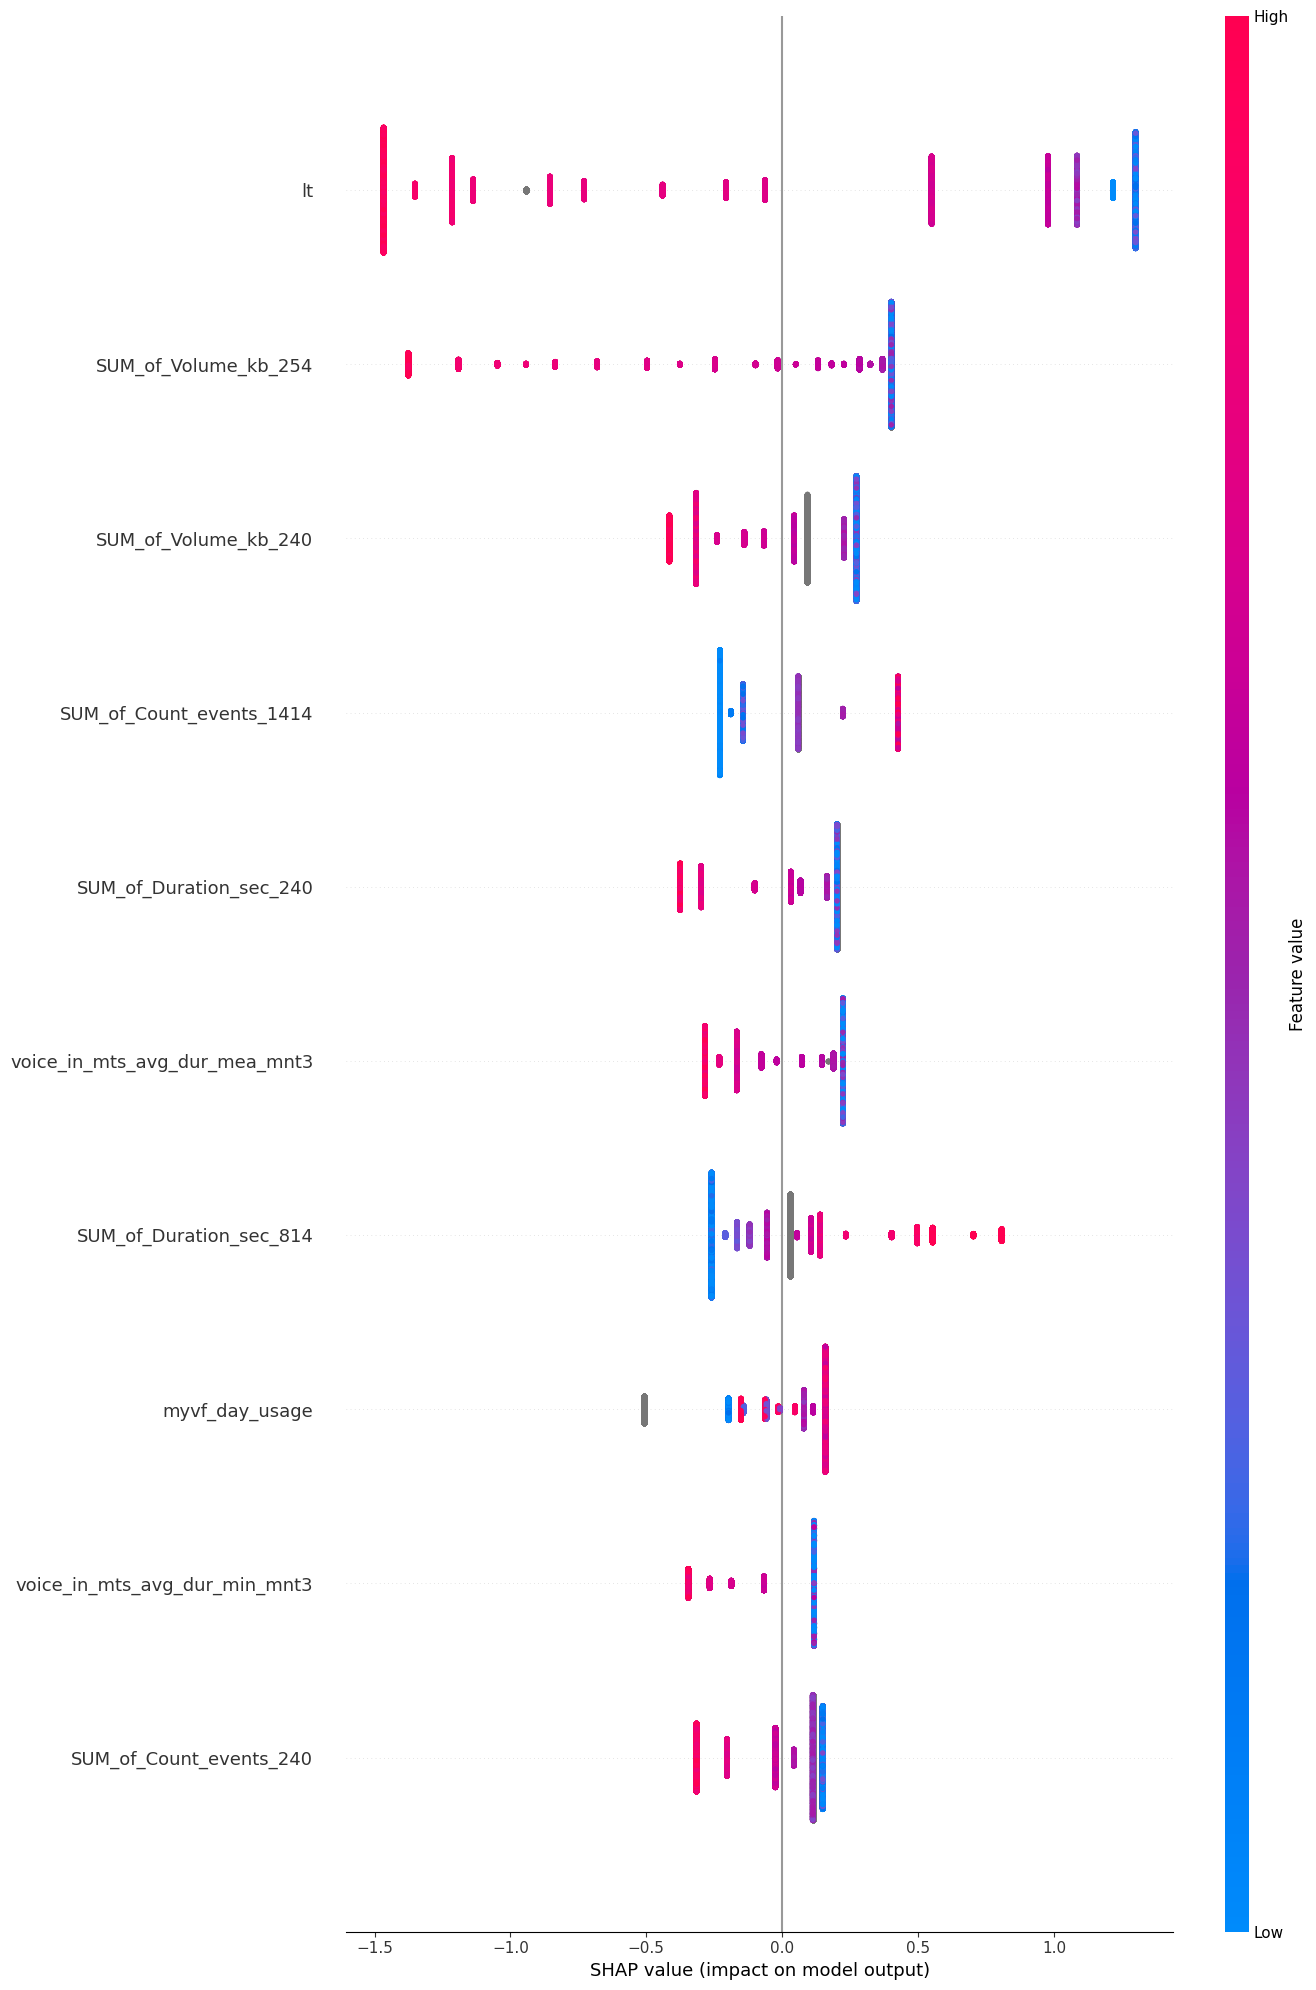

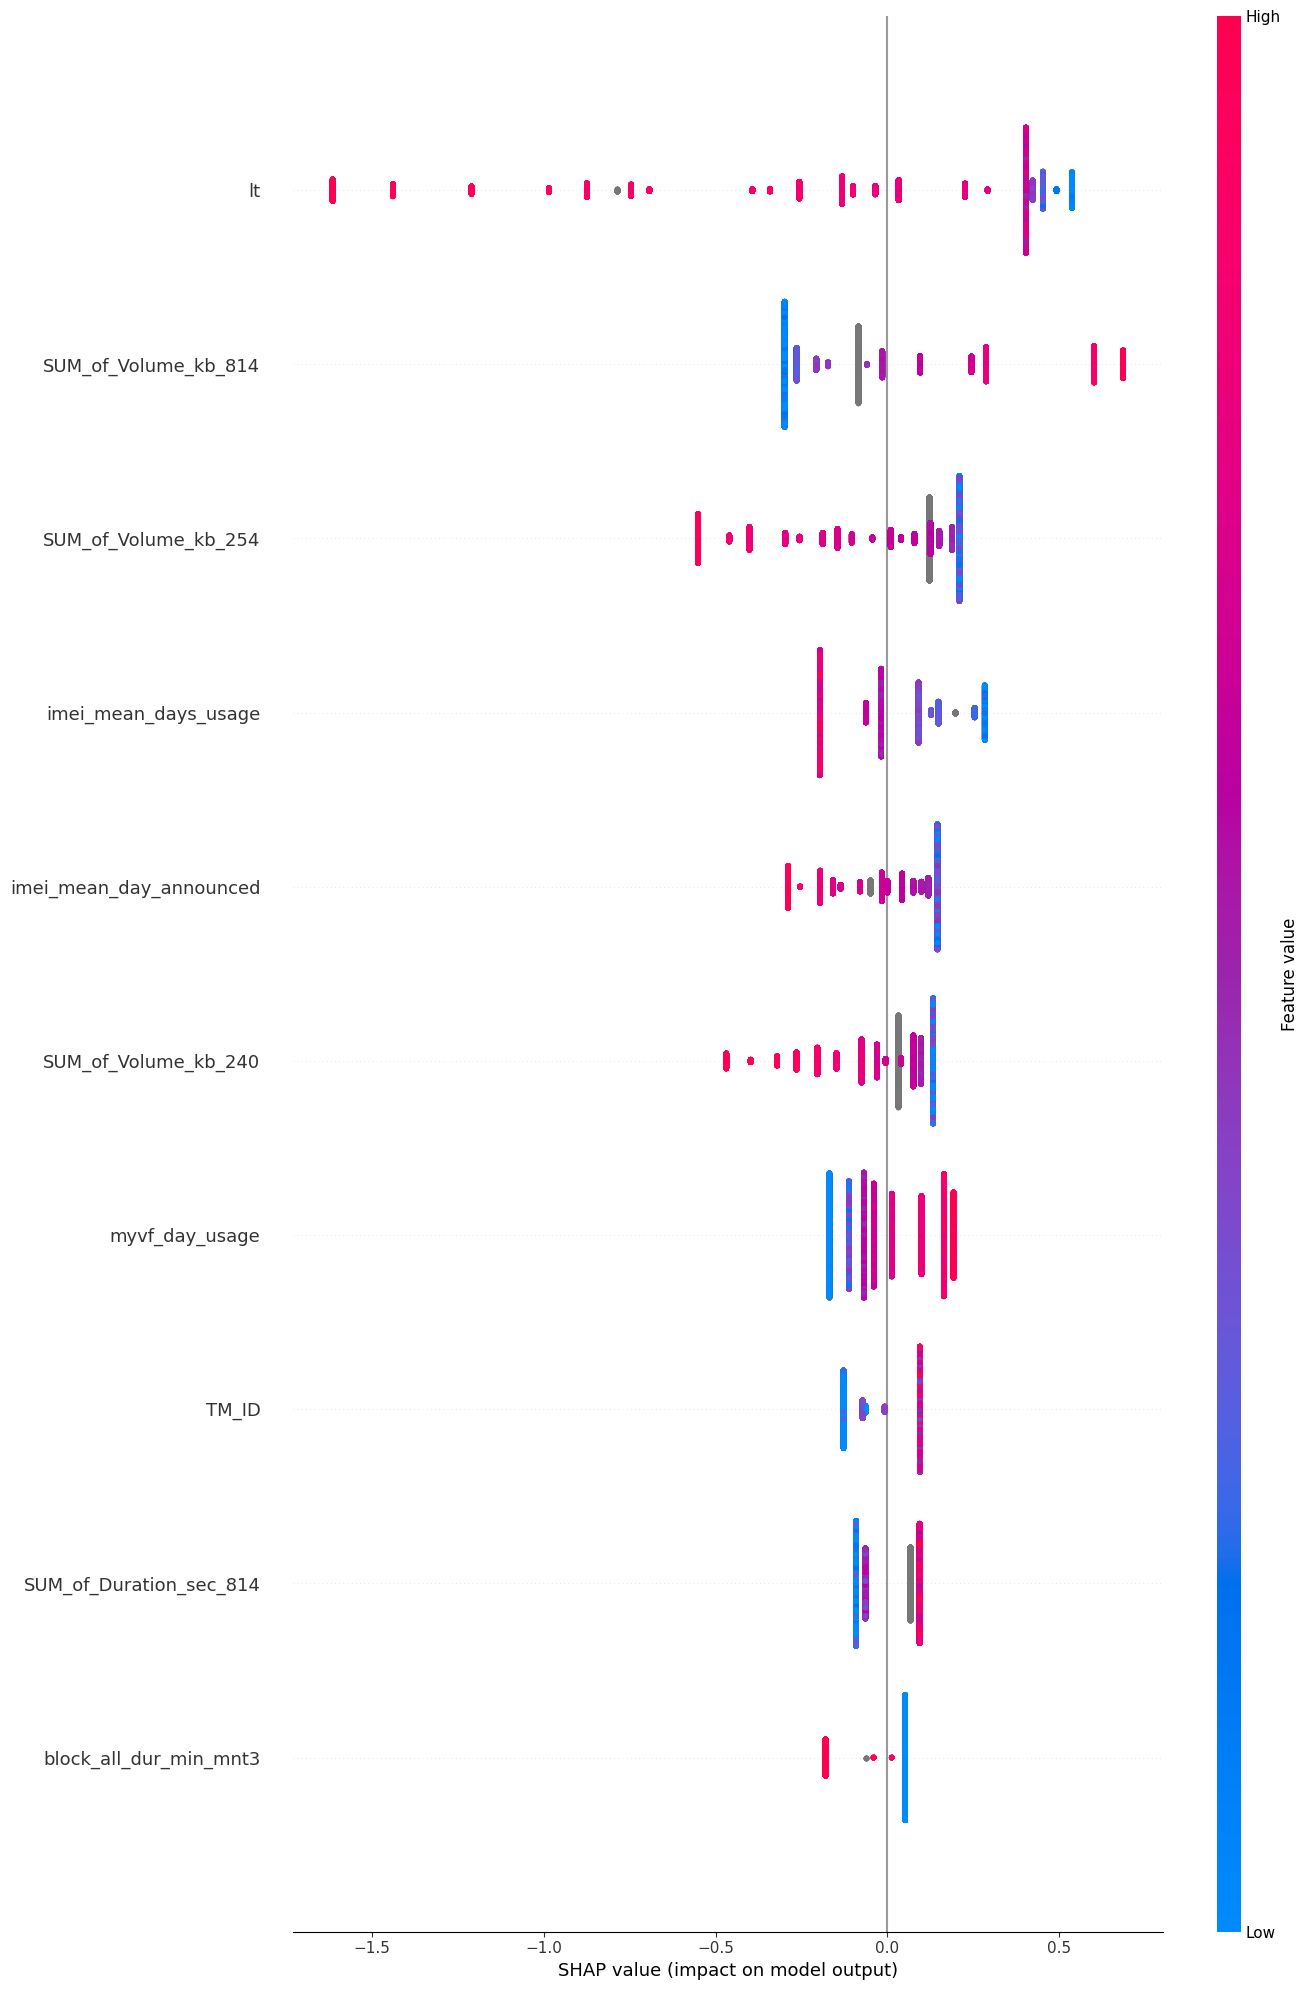

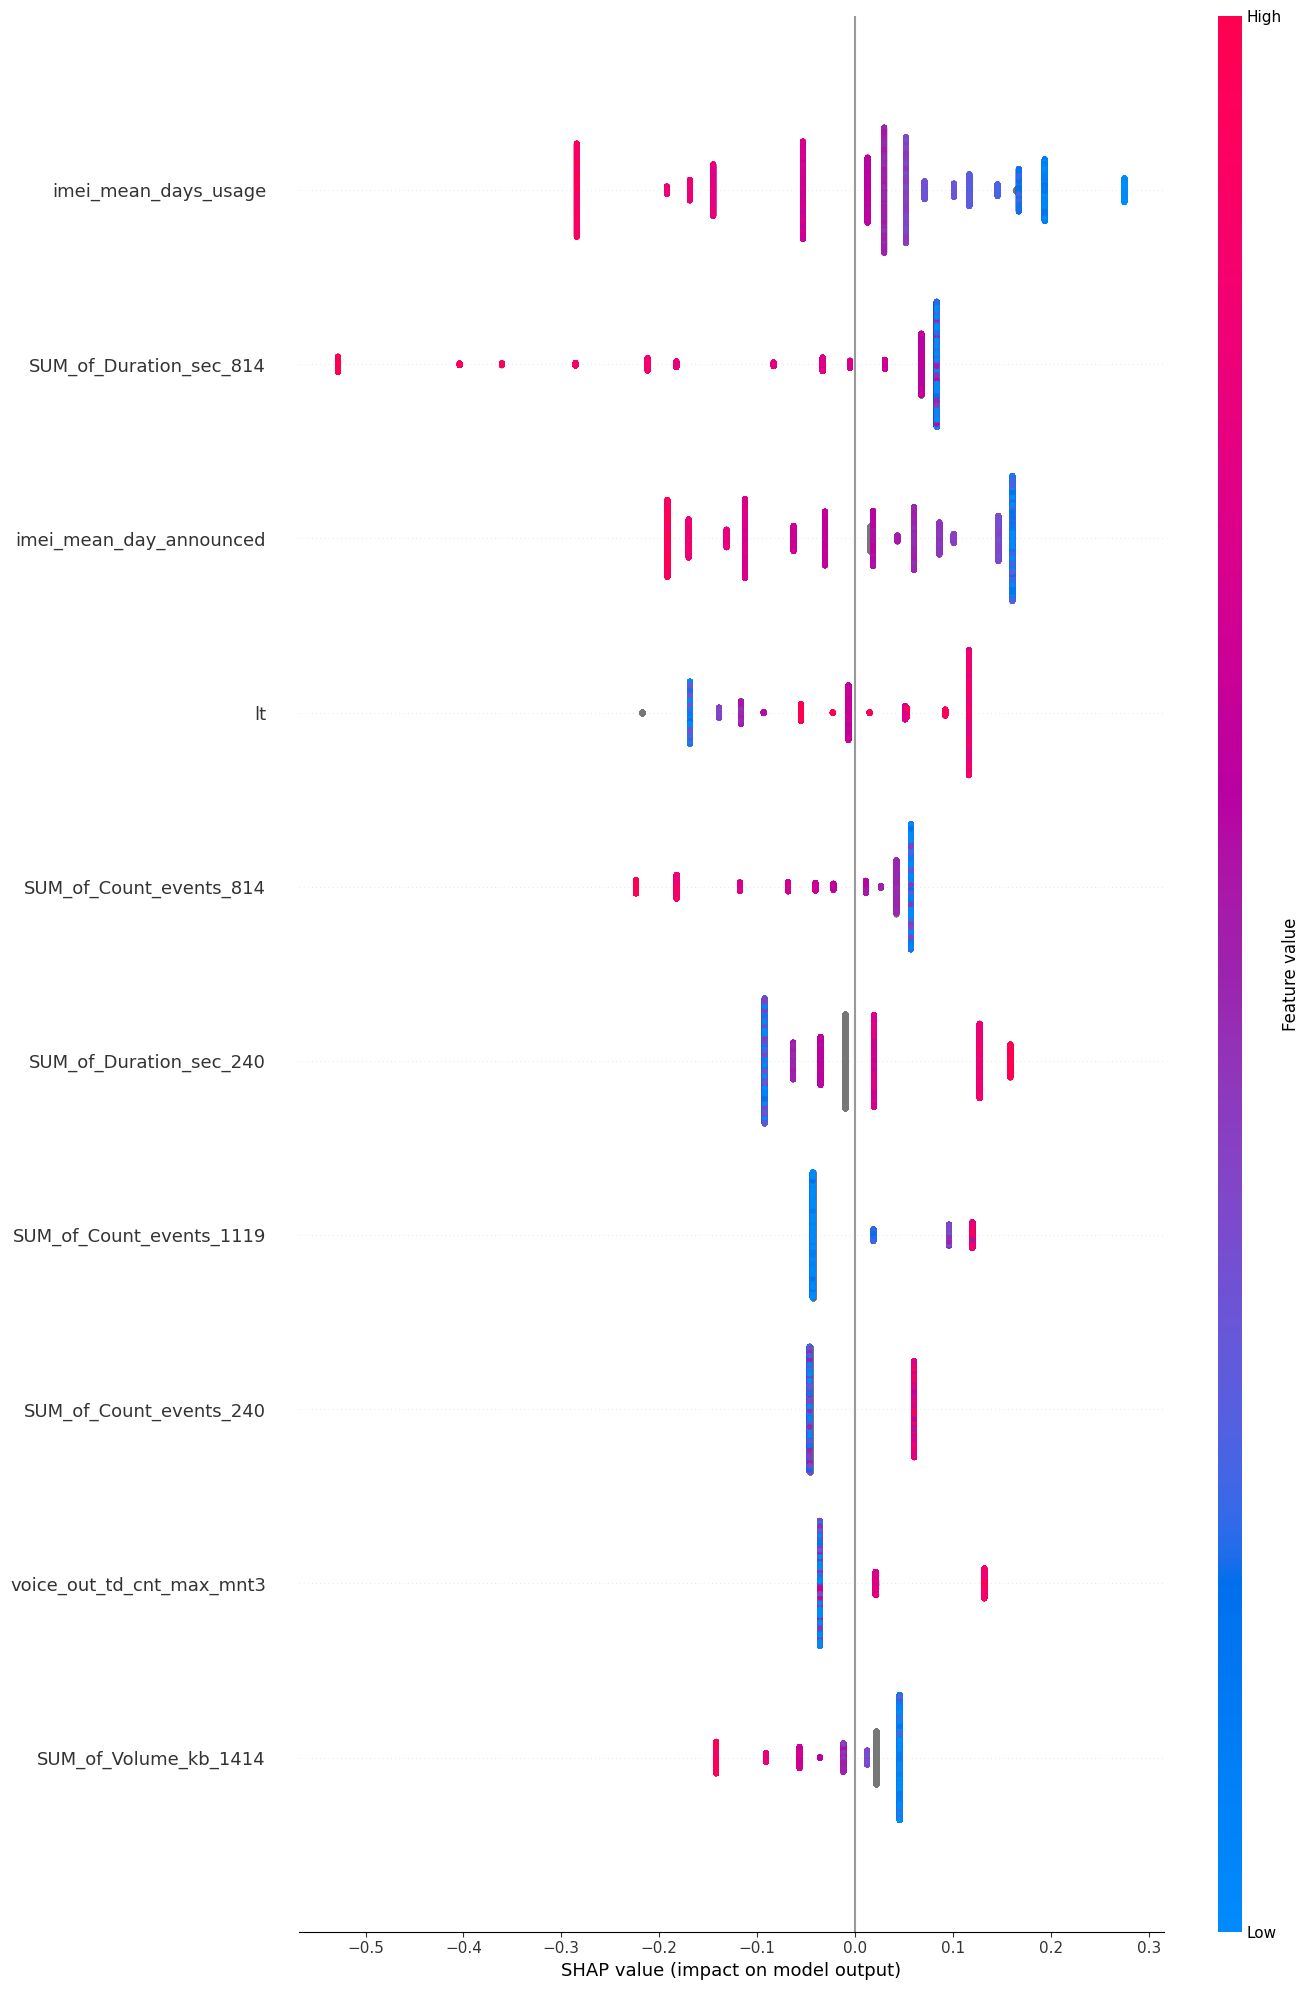

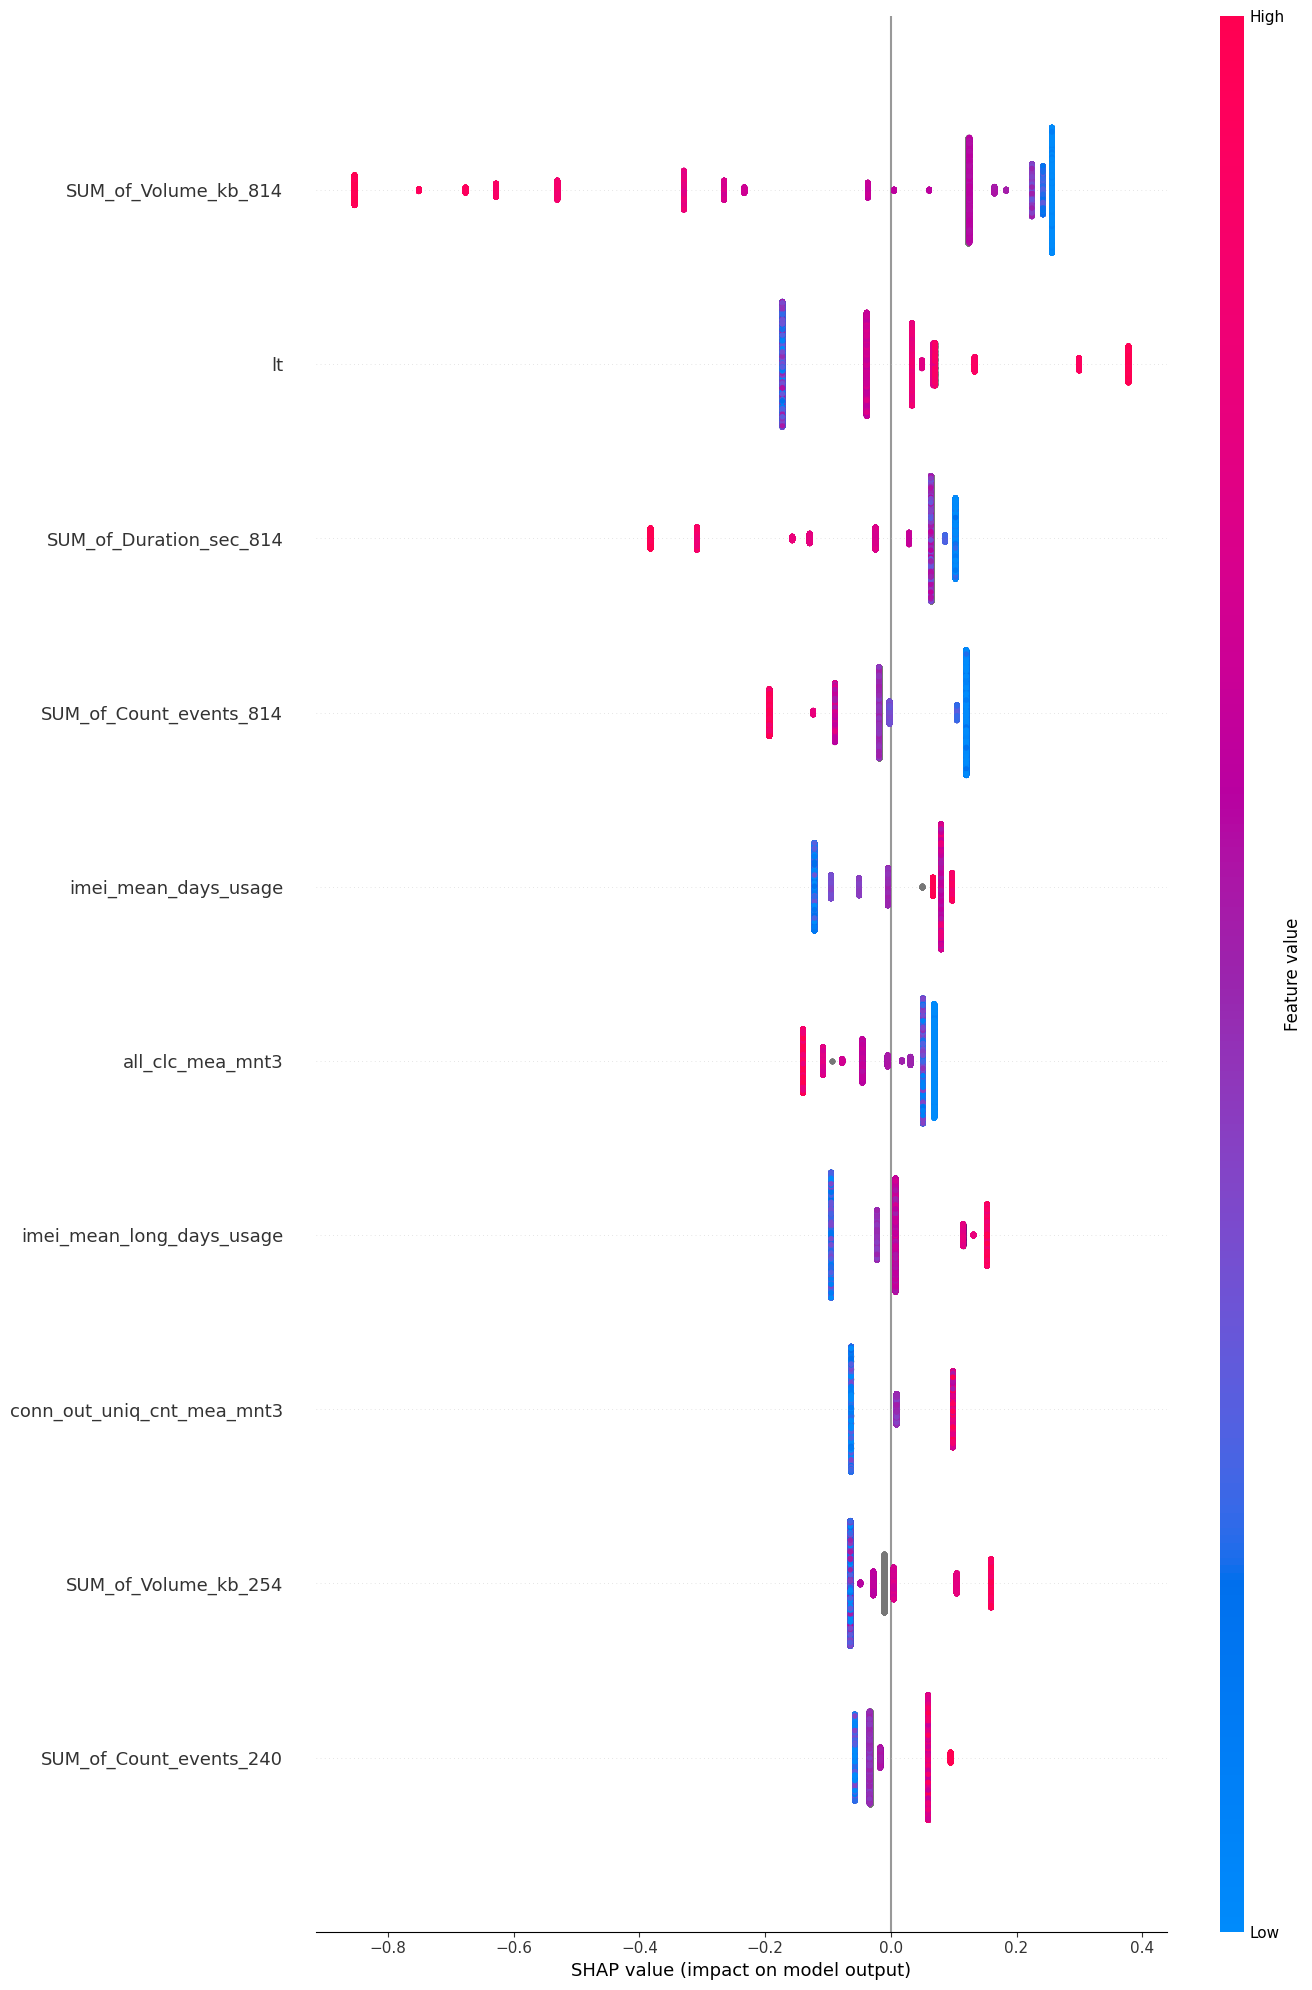

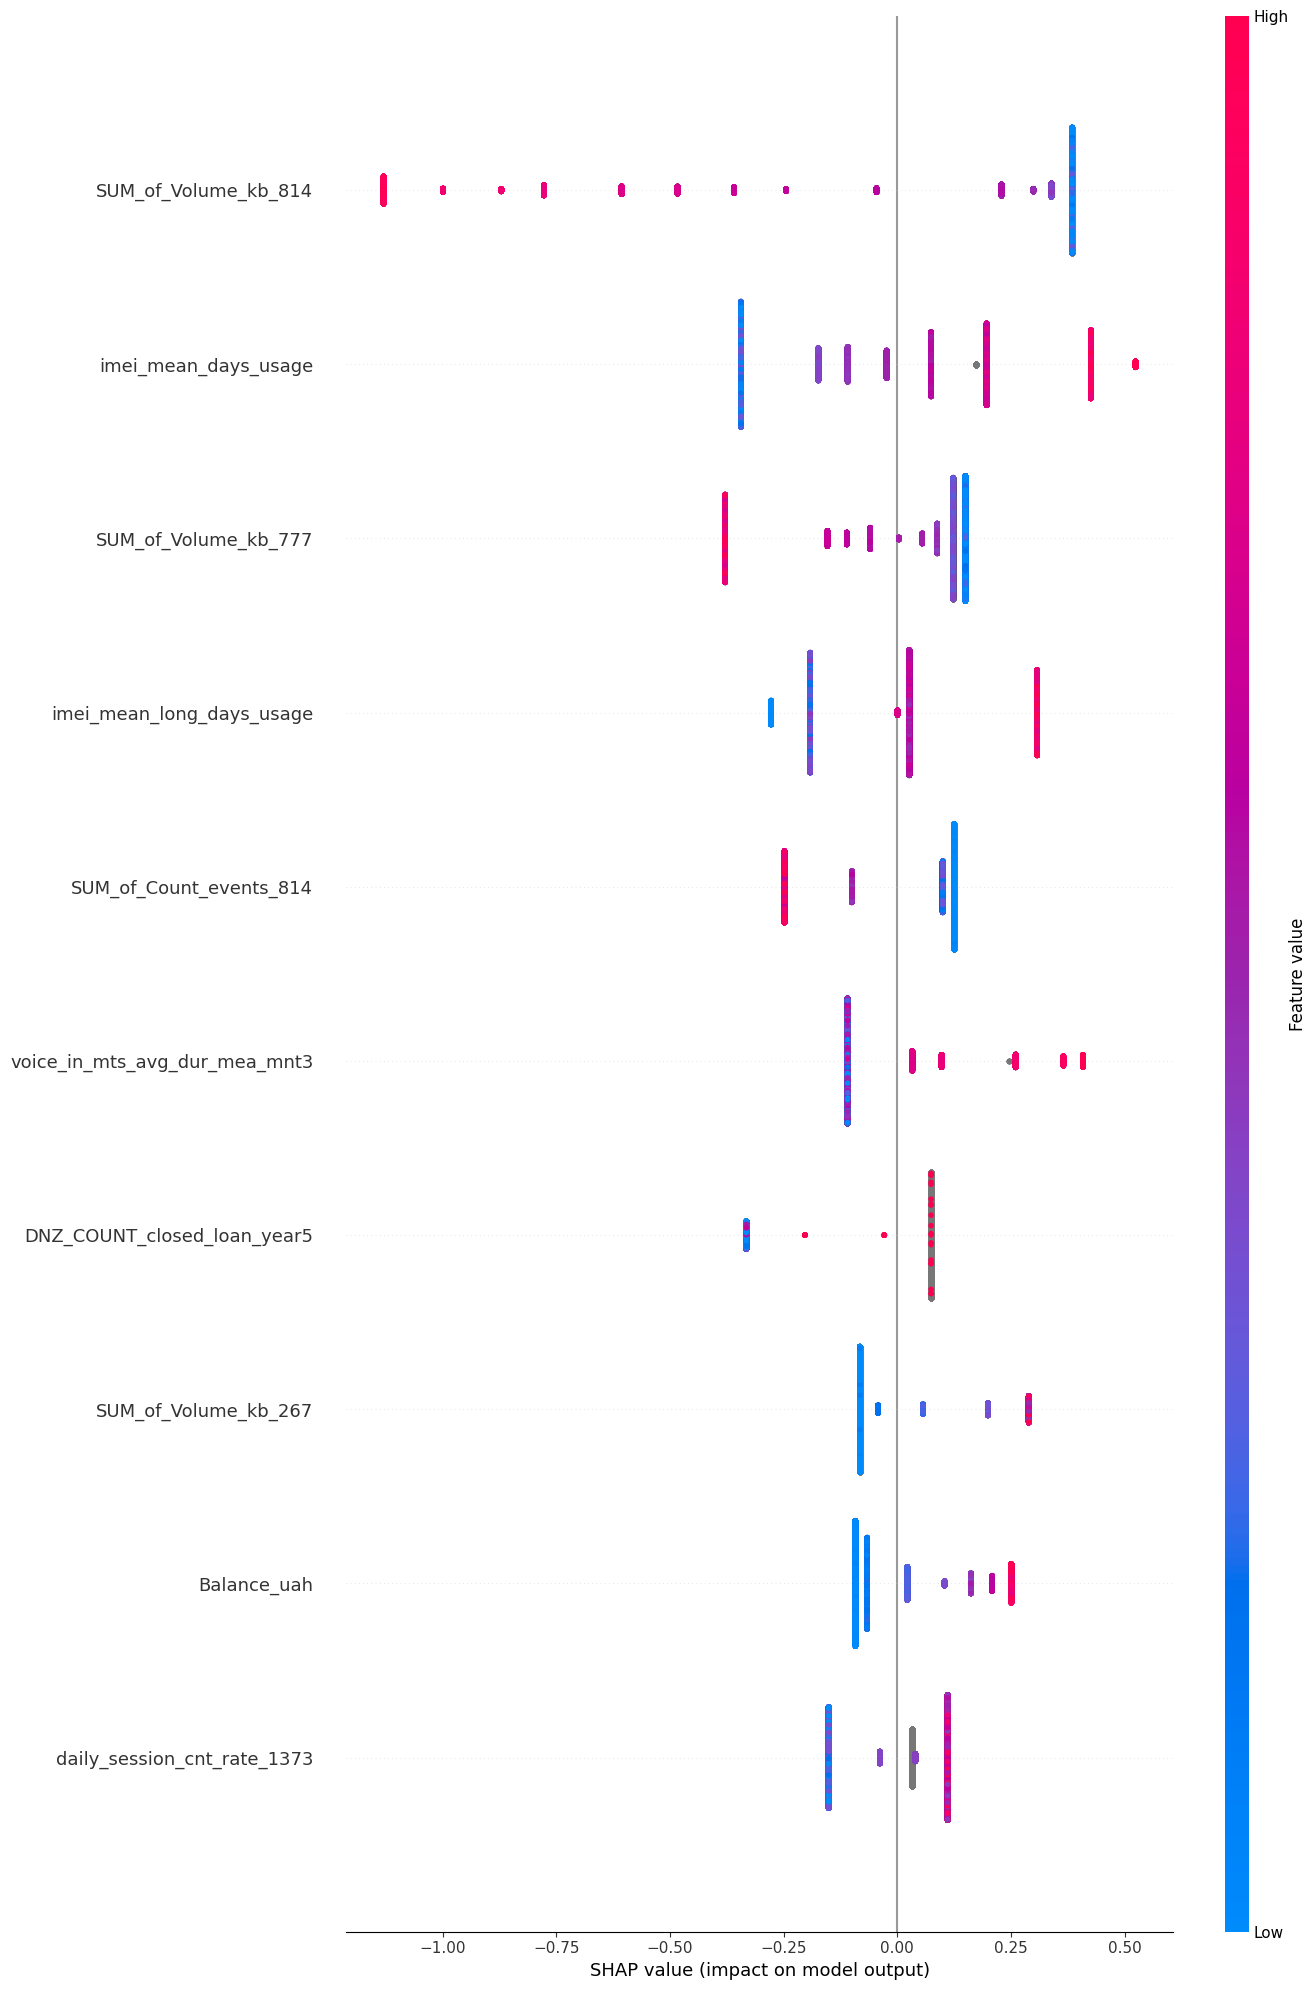

In [86]:
shap_values = shap.TreeExplainer(model).shap_values(X_test)

titles = ["<20", "20-30", "30-40", "40-50", ">50"]
titles.reverse()

for values in shap_values:
    shap.summary_plot(
        values,
        X_test,
        plot_size=(14, 20),
        # For some reason it doesn't work
        title=titles.pop(),
        max_display=10,
    )

## Group 1: less than 20 years portrait

In [6]:
lt20 = [
    "lt",
    "SUM_of_Volume_kb_254",
    "SUM_of_Volume_kb_240",
    "SUM_of_Count_events_1414",
    "SUM_of_Duration_sec_240",
    "voice_in_mts_avg_dur_mea_mnt3",
    "SUM_of_Duration_sec_814",
    "myvf_day_usage",
    "voice_in_mts_avg_dur_min_mnt3",
    "SUM_of_Count_events_240",
]
c2030 = [
    "lt",
    "SUM_of_Volume_kb_814",
    "SUM_of_Volume_kb_254",
    "imei_mean_days_usage",
    "imei_mean_day_announced",
    "SUM_of_Volume_kb_240",
    "myvf_day_usage",
    "TM_ID",
    "SUM_of_Duration_sec_814",
    "block_all_dur_min_mnt3",
]
c3040 = [
    "imei_mean_days_usage",
    "SUM_of_Duration_sec_814",
    "imei_mean_day_announced",
    "lt",
    "SUM_of_Count_events_814",
    "SUM_of_Duration_sec_240",
    "SUM_of_Count_events_1119",
    "SUM_of_Count_events_240",
    "voice_out_td_cnt_max_mnt3",
    "SUM_of_Volume_kb_1414",
]
c4050 = [
    "SUM_of_Volume_kb_814",
    "lt",
    "SUM_of_Duration_sec_814",
    "SUM_of_Count_events_814",
    "imei_mean_days_usage",
    "all_clc_mea_mnt3",
    "imei_mean_long_days_usage",
    "conn_out_uniq_cnt_mea_mnt3",
    "SUM_of_Volume_kb_254",
    "SUM_of_Count_events_240",
]
gt50 = [
    "SUM_of_Volume_kb_814",
    "imei_mean_days_usage",
    "SUM_of_Volume_kb_777",
    "imei_mean_long_days_usage",
    "SUM_of_Count_events_814",
    "voice_in_mts_avg_dur_mea_mnt3",
    "DNZ_COUNT_closed_loan_year5",
    "SUM_of_Volume_kb_267",
    "Balance_uah",
    "daily_session_cnt_rate_1373",
]
group_names = ["<20", "20-30", "30-40", "40-50", ">50"]
groups = [
    lt20,
    c2030,
    c3040,
    c4050,
    gt50,
]
all_keys = sum(groups, [])

for index, group in enumerate(groups):
    print(f"Unique keys for group {index}:")
    for key in group:
        if all_keys.count(key) == 1:
            print(f"- {key}")

uniq_keys = list(set(all_keys))

print(f"\nUniq keys count: {len(uniq_keys)}")

Unique keys for group 0:
- SUM_of_Count_events_1414
- voice_in_mts_avg_dur_min_mnt3
Unique keys for group 1:
- TM_ID
- block_all_dur_min_mnt3
Unique keys for group 2:
- SUM_of_Count_events_1119
- voice_out_td_cnt_max_mnt3
- SUM_of_Volume_kb_1414
Unique keys for group 3:
- all_clc_mea_mnt3
- conn_out_uniq_cnt_mea_mnt3
Unique keys for group 4:
- SUM_of_Volume_kb_777
- DNZ_COUNT_closed_loan_year5
- SUM_of_Volume_kb_267
- Balance_uah
- daily_session_cnt_rate_1373

Uniq keys count: 27


In [10]:
y_pred = predict(X_test)
y_tp = y_test[y_test == y_pred]
df_portrait = X_test[uniq_keys]
df_portrait.describe()

,SUM_of_Volume_kb_814,SUM_of_Count_events_1119,imei_mean_long_days_usage,voice_in_mts_avg_dur_mea_mnt3,SUM_of_Duration_sec_814,TM_ID,SUM_of_Duration_sec_240,SUM_of_Volume_kb_1414,SUM_of_Volume_kb_240,SUM_of_Count_events_814,...,block_all_dur_min_mnt3,imei_mean_day_announced,SUM_of_Volume_kb_254,imei_mean_days_usage,conn_out_uniq_cnt_mea_mnt3,lt,DNZ_COUNT_closed_loan_year5,all_clc_mea_mnt3,myvf_day_usage,SUM_of_Volume_kb_777
count,36027.0000,3.602700e+04,4.417300e+04,4.429800e+04,3.602700e+04,44307.0,36027.00000,36027.00000,36027.00000,3.602700e+04,...,44296.000,42634.00000,36027.00,4.420500e+04,4.429600e+04,4.414200e+04,8128.000000,4.429600e+04,40037.00000,36027.00000
mean,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,3.720703,inf,inf,inf
std,90.3125,1.610938e+01,6.367188e+00,1.249219e+01,5.262500e+01,inf,40.90625,85.87500,54.09375,3.515625e+01,...,74.625,11.75000,74.50,6.800781e+00,3.697266e+00,3.088379e-01,3.515625,5.847656e+00,7.75000,42.56250
min,0.0000,0.000000e+00,8.687500e+00,0.000000e+00,0.000000e+00,3560.0,0.00000,0.00000,0.00000,0.000000e+00,...,0.000,-58.12500,0.00,0.000000e+00,0.000000e+00,1.277344e+00,0.000000,0.000000e+00,0.00000,0.00000
25%,5.6250,0.000000e+00,3.862500e+01,8.148438e+00,1.423438e+01,3768.0,55.15625,0.00000,60.87500,2.207031e+00,...,0.000,43.31250,75.25,3.331250e+01,0.000000e+00,5.769531e+00,1.480469,0.000000e+00,47.06250,10.43750
50%,104.3750,2.207031e+00,4.271875e+01,2.217188e+01,7.250000e+01,3912.0,86.00000,61.84375,105.93750,3.350000e+01,...,0.000,48.50000,137.75,3.762500e+01,3.802734e+00,5.992188e+00,2.207031,6.097656e+00,51.93750,53.71875
75%,190.3750,1.817188e+01,4.671875e+01,2.837500e+01,1.122500e+02,4012.0,107.93750,157.00000,135.00000,6.768750e+01,...,0.000,53.21875,182.00,4.181250e+01,6.675781e+00,6.125000e+00,4.785156,1.054688e+01,54.65625,85.00000
max,336.0000,1.210000e+02,6.612500e+01,5.409375e+01,2.270000e+02,4152.0,229.62500,330.50000,266.50000,1.622500e+02,...,178.250,82.68750,327.50,6.587500e+01,2.660938e+01,6.691406e+00,31.703125,5.903125e+01,59.12500,220.00000


In [83]:
rows = []


# compare each group in one-vs-rest manner
for index, label in enumerate(group_names):
    df_one = df_portrait.loc[y_tp[y_tp == index].index]
    df_rest = df_portrait.loc[y_tp[y_tp != index].index]

    df_one_stats = df_one.describe().T
    df_rest_stats = df_rest.describe().T

    for feature, stats in df_one_stats.iterrows():
        for metric in ["std", "min", "25%", "50%", "75%", "max"]:
            rows.append(
                {
                    "group": label,
                    "feature": feature,
                    "metric": metric,
                    "value": stats[metric],
                    "value_rest": df_rest_stats.loc[feature, metric],
                    "delta": stats[metric] - df_rest_stats.loc[feature, metric],
                },
            )

df_stats = pd.DataFrame(
    rows,
    columns=[
        "group",
        "feature",
        "metric",
        "value",
        "value_rest",
        "delta",
    ],
)

df_stats

,group,feature,metric,value,value_rest,delta,order
0,<20,SUM_of_Volume_kb_814,std,92.93750,89.812500,3.125000,99
1,<20,SUM_of_Volume_kb_814,min,0.00000,0.000000,0.000000,99
2,<20,SUM_of_Volume_kb_814,25%,33.12500,16.609375,16.515625,99
3,<20,SUM_of_Volume_kb_814,50%,177.62500,108.625000,69.000000,99
4,<20,SUM_of_Volume_kb_814,75%,218.62500,193.875000,24.750000,99
...,...,...,...,...,...,...,...
805,>50,SUM_of_Volume_kb_777,min,0.00000,0.000000,0.000000,2
806,>50,SUM_of_Volume_kb_777,25%,0.00000,26.890625,-26.890625,2
807,>50,SUM_of_Volume_kb_777,50%,35.71875,65.562500,-29.843750,2
808,>50,SUM_of_Volume_kb_777,75%,61.00000,93.500000,-32.500000,2


In [84]:
df_max_by_feature = df_stats.copy()
df_max_by_feature["delta"] = df_max_by_feature["delta"].abs()
df_max_by_feature = df_max_by_feature.groupby(["feature", "metric"])["delta"].max()
df_stats["delta_norm"] = df_stats.apply(
    lambda row: row["delta"] / df_max_by_feature.loc[(row["feature"], row["metric"])],
    axis=1,
)

In [98]:
for index, group in enumerate(group_names):
    df_chart = df_stats[
        (df_stats["metric"] == "50%") & (df_stats["feature"].isin(groups[index]))
    ]

    df_chart["order"] = df_chart.apply(
        lambda row: 10 * group_names.index(row["group"])
        + groups[index].index(row["feature"]),
        axis=1,
    )

    px.bar(
        df_chart.sort_values(by="order", ascending=True),
        x="feature",
        y="delta_norm",
        color="group",
        barmode="group",
        hover_data=["delta", "value", "value_rest"],
        title=f"Features for group portrait: {group}",
    ).show()